In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import missingno as msno
import plotly.express as px
import os
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import csv
import warnings


warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
os.chdir("E:\Resume\Toronto\Loblaw, customer business insights analyst co-op")

In [3]:
os.getcwd()

'E:\\Resume\\Toronto\\Loblaw, customer business insights analyst co-op'

In [4]:
# df is the Cheese_Sales_Data

df = pd.read_excel("Promotional Effectiveness - Supporting Data (R2000204427).xls")

# Q1.
Describe the data set and clean if necessary.

In [5]:
df

,Year,PW,Product,Price,On Flyer?,Discount,Units,Sales $,Gross Margin $,Transactions
0,2017,1,Cracker Barrel,7.99,No,0.00,8630,68953.70,33570.70,8460
1,2017,2,Cracker Barrel,7.29,Yes,0.10,10183,74234.07,32483.77,9983
2,2017,3,Cracker Barrel,5.49,Yes,0.30,21568,118408.32,29979.52,17117
3,2017,4,Cracker Barrel,7.49,Yes,0.05,9309,69724.41,31557.51,9038
4,2017,5,Cracker Barrel,7.99,No,0.00,8462,67611.38,32917.18,8379
...,...,...,...,...,...,...,...,...,...,...
131,2018,21,President's Choice,2.99,Yes,0.40,57649,172370.51,10953.31,22608
132,2018,34,President's Choice,2.99,Yes,0.40,57649,172370.51,10953.31,22608
133,2018,42,President's Choice,2.99,Yes,0.40,57655,172388.45,10954.45,22390
134,2018,47,President's Choice,2.99,Yes,0.40,55987,167401.13,10637.53,22173


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            136 non-null    int64  
 1   PW              136 non-null    int64  
 2   Product         136 non-null    object 
 3   Price           136 non-null    float64
 4   On Flyer?       136 non-null    object 
 5   Discount        136 non-null    float64
 6   Units           136 non-null    int64  
 7   Sales $         136 non-null    float64
 8   Gross Margin $  136 non-null    float64
 9   Transactions    136 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 10.8+ KB


In [84]:
continous = df.select_dtypes(include=np.number).columns
categorical = df.columns.drop(continous)

print("there are 136 instances and 10 features in the dataset")
print()
print("{} are continous features, which are {}".format(len(continous),continous))
print()
print("{} are categorical features, which are {}".format(len(categorical),categorical))

there are 136 instances and 10 features in the dataset

8 are continous features, which are Index(['Year', 'PW', 'Price', 'Discount', 'Units', 'Sales $', 'Gross Margin $',
       'Transactions'],
      dtype='object')

2 are categorical features, which are Index(['Product', 'On Flyer?'], dtype='object')


In [8]:
# the genearl STATS of the dataset

df.describe()

,Year,PW,Price,Discount,Units,Sales $,Gross Margin $,Transactions
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,2017.455882,22.183824,5.403235,0.169118,22837.742647,102201.755882,24559.192608,15668.316176
std,0.499891,15.466189,1.701059,0.175759,17938.045665,58159.204370,11508.737167,11035.839330
min,2017.000000,1.000000,2.490000,0.000000,780.000000,22.000000,-23932.000000,8216.000000
25%,2017.000000,9.000000,3.990000,0.000000,9677.750000,66464.970000,22918.162500,9305.750000
50%,2017.000000,18.500000,4.990000,0.150000,13118.000000,73012.860000,24993.375000,12188.500000
75%,2018.000000,35.250000,6.790000,0.300000,32630.250000,132518.790000,32921.070000,21320.000000
max,2018.000000,52.000000,8.990000,0.500000,93453.000000,434542.000000,65425.000000,98421.000000


In [6]:
# there are no missing values

df.isnull().sum()

Year              0
PW                0
Product           0
Price             0
On Flyer?         0
Discount          0
Units             0
Sales $           0
Gross Margin $    0
Transactions      0
dtype: int64

In [12]:
#Sales distribution
fig = px.histogram(df, x="Sales $", marginal="box",
                  title = "Sales $ distribution")

fig.show()

In [14]:
#Units distribution
fig = px.histogram(df, x="Units", marginal="box",
                  title = "Units distribution")

fig.show()

In [15]:
#Transactions distribution
fig = px.histogram(df, x="Transactions", marginal="box",
                  title = "Transactions distribution")

fig.show()

In [13]:
#Gross Margin distribution
fig = px.histogram(df, x="Gross Margin $", marginal="box",
                  title = "Gross Margin $ distribution")

fig.show()

1.No missing values in the dataset

2.But there are gaps between the time-series data

3.Need to figure out what feature "PW" means. Here we assume it is Promotion Week

4.There are outliers in the dataset by looking at the Sales/Units/Gross Margin/Transactions distribution

5.For PC data in year 2018, there are duplicates in the same time-period with different discount rate

6.PC time-series is not sorted by PW in year 2018

# Q2.
What price point is most effective at maximizing sales? Gross margin?

In [7]:
df.columns

Index(['Year', 'PW', 'Product', 'Price', 'On Flyer?', 'Discount', 'Units',
       'Sales $', 'Gross Margin $', 'Transactions'],
      dtype='object')

In [50]:
fig = make_subplots(rows=2, cols=1, shared_yaxes=True,
                   subplot_titles=("Sales Varying by Price", "Gross Margin Varying by Price"))


fig.add_trace(go.Bar(x=df["Price"], y=df["Sales $"]),
              1, 1)

fig.add_trace(go.Bar(x=df["Price"], y=df["Gross Margin $"]),
              2, 1)


# Update yaxis properties
fig.update_yaxes(title_text="Sales", row=1, col=1)
fig.update_yaxes(title_text="Gross Margin", row=2, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Price", row=1, col=1)
fig.update_xaxes(title_text="Price", row=2, col=1)


fig.add_annotation(x=3.99,y=2507911,xref="x",yref="y",text="P=3.99,Sales=$2,507,911",font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8,
        showarrow=True,row=1, col=1)

fig.add_annotation(x=7.99,y=940656,xref="x",yref="y",text="P=7.99,GM=$940,656",font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8,
        showarrow=True,row=2, col=1)


fig.update_layout(height=600, width=800, title_text="Total Sales & Gross Margin Varying by Price")
fig.show()

1.Selling Price **3.99** returns the **max Sales 2,507,911**

2.Selling Price **7.99** returns the **max Gross Margin 940,656**

# Q3.
Is Cheese seasonal (influenced by time of year)? Explain why or why not.

Our Strategy here is too separate the Product by Brand then look at the seasonality pattern in Year 2017/2018

In [375]:
fig = px.line(df[df["Product"] == "Cracker Barrel"], x="PW", y="Discount", color='Year',
             title="Cracker Barrel Discount Seasonality by PW")

fig.show()

In [338]:
# Cracker Barrel in Year 2017

x = df[(df["Product"] == "Cracker Barrel")&(df["Year"] == 2017)]["PW"]
# y1 = df[(df["Product"] == "Cracker Barrel")&(df["Year"] == 2017)]["Discount"]
y2 = df[(df["Product"] == "Cracker Barrel")&(df["Year"] == 2017)]["Sales $"]
y3 = df[(df["Product"] == "Cracker Barrel")&(df["Year"] == 2017)]["Units"]
y4 = df[(df["Product"] == "Cracker Barrel")&(df["Year"] == 2017)]["Gross Margin $"]

# Create traces
fig = go.Figure()
# fig.add_trace(go.Scatter(x=x, y=y1,
#                     mode='lines',
#                     name='Discount Rate'))

fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines',
                    name='Sales $'))

fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines',
                    name='Units'))

fig.add_trace(go.Scatter(x=x, y=y4,
                    mode='lines',
                    name='Gross Margin $'))

fig.update_layout(title='Cracker Barrel Cheese Sales/Units/Margin in Year 2017',
                   xaxis_title='PW',
                   yaxis_title='$ Value')

In [343]:
# Cracker Barrel in Year 2018

x = df[(df["Product"] == "Cracker Barrel")&(df["Year"] == 2018)]["PW"]
# y1 = df[(df["Product"] == "Cracker Barrel")&(df["Year"] == 2018)]["Discount"]
y2 = df[(df["Product"] == "Cracker Barrel")&(df["Year"] == 2018)]["Sales $"]
y3 = df[(df["Product"] == "Cracker Barrel")&(df["Year"] == 2018)]["Units"]
y4 = df[(df["Product"] == "Cracker Barrel")&(df["Year"] == 2018)]["Gross Margin $"]

# Create traces
fig = go.Figure()
# fig.add_trace(go.Scatter(x=x, y=y1,
#                     mode='lines',
#                     name='Discount Rate'))

fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines',
                    name='Sales $'))

fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines',
                    name='Units'))

fig.add_trace(go.Scatter(x=x, y=y4,
                    mode='lines',
                    name='Gross Margin $'))

fig.update_layout(title='Cracker Barrel Cheese Sales/Units/Margin in Year 2018',
                   xaxis_title='PW',
                   yaxis_title='$ Value')

In [402]:
# For PC products, because of the duplicates and unsorted PW, we sort the "PW" first

df_PC = df[df["Product"] != "Cracker Barrel"].sort_values("PW")

In [403]:
fig = px.line(df_PC, x="PW", y="Discount", color='Year',
             title="PC Discount Seasonality by PW")


fig.show()

In [404]:
# PC in Year 2017

x = df_PC[(df["Year"] == 2017)]["PW"]
y2 = df_PC[(df["Year"] == 2017)]["Sales $"]
y3 = df_PC[(df["Year"] == 2017)]["Units"]
y4 = df_PC[(df["Year"] == 2017)]["Gross Margin $"]

# Create traces
fig = go.Figure()


fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines',
                    name='Sales $'))

fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines',
                    name='Units'))

fig.add_trace(go.Scatter(x=x, y=y4,
                    mode='lines',
                    name='Gross Margin $'))

fig.update_layout(title='PC Cheese Sales/Units/Margin in Year 2017',
                   xaxis_title='PW',
                   yaxis_title='$ Value')

In [405]:
# PC in Year 2018

x = df_PC[(df["Year"] == 2018)]["PW"]
y2 = df_PC[(df["Year"] == 2018)]["Sales $"]
y3 = df_PC[(df["Year"] == 2018)]["Units"]
y4 = df_PC[(df["Year"] == 2018)]["Gross Margin $"]

# Create traces
fig = go.Figure()


fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines',
                    name='Sales $'))

fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines',
                    name='Units'))

fig.add_trace(go.Scatter(x=x, y=y4,
                    mode='lines',
                    name='Gross Margin $'))

fig.update_layout(title='PC Cheese Sales/Units/Margin in Year 2018',
                   xaxis_title='PW',
                   yaxis_title='$ Value')

For **Cracker Barrel** Cheese:
    
   In Year **2017/2018** there are **seasonality** in Sales/Units/GM which go with products' discount rate

For **PC** Cheese:

   In Year **2017**, there is **no seasonality**, and no discount rate
    
   In Year **2018**, there is **not a strong seasonal pattern** in Sales/Units/GM that go with products' discount rate

# Q4
How would Cracker Barrel perform for sales, margin and units with a 25% discount? 60% discount?

# Cracker Barrel Sales/GM/Units Varying by Discount

In [129]:
fig = make_subplots(rows=3, cols=1, shared_yaxes=True,
                   subplot_titles=("Sales Varying by Discount", "Gross Margin Varying by Discount", "Unit Varying by Discount"))

df_1 = df[(df["Product"] == "Cracker Barrel")]

fig.add_trace(go.Bar(x=df_1["Discount"], y=df_1["Sales $"]),
              1, 1)

fig.add_trace(go.Bar(x=df_1["Discount"], y=df_1["Gross Margin $"]),
              2, 1)

fig.add_trace(go.Bar(x=df_1["Discount"], y=df_1["Units"]),
              3, 1)

# Update xaxis properties
fig.update_xaxes(title_text="Sales", row=1, col=1)
fig.update_xaxes(title_text="Gross Margin", row=2, col=1)
fig.update_xaxes(title_text="Units", row=3, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Discount Rate", row=1, col=1)
fig.update_yaxes(title_text="Discount Rate", row=2, col=1)
fig.update_yaxes(title_text="Discount Rate", row=3, col=1)

fig.update_layout(height=600, width=800, title_text="Cracker Barrel Performance Varying by Discount")
fig.show()

For **Cracker Barrel**

**Sales and Units** overall show a **positive** correaltion with **Discount Rate** goes up

**Gross Margin** does not inflate much, however, shows a **negative** correlation once **Discount Rate** surpasses **0.4** and eventually turns **negative** when **Discount Rate** reaches **0.5**

### Regression Sales/Units/GM on 25%, 60% Discount Rate；Cracker Barrel Products

In [ ]:
# Set Sales as target variables

In [170]:
# packages for ML
import scipy.stats as stats
import pylab
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from yellowbrick.datasets import load_concrete 
from yellowbrick.regressor import ResidualsPlot

Skewness for 'Sales' is 1.9872
Skewness for 'Units' is 1.3437
Skewness for 'GM' is -1.4191


Text(0.5, 1.0, 'GM Distribution')

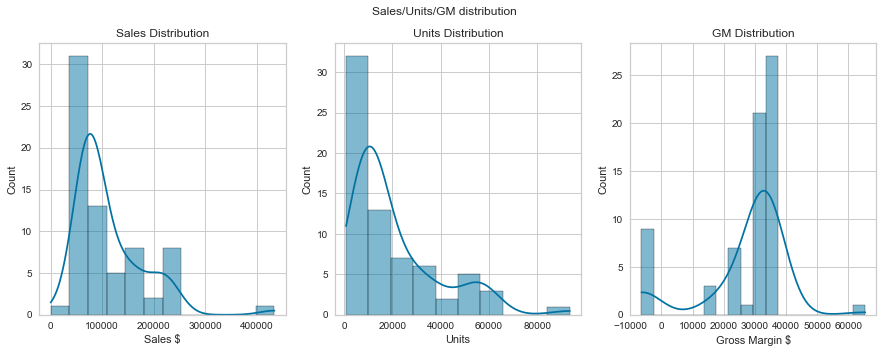

In [413]:
# simple regression bewteen Discount Rate and Sales/Units/GM

df_CB = df[df["Product"] == "Cracker Barrel"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Sales/Units/GM distribution')


# Sales
sns.histplot(ax=axes[0], data=df_CB["Sales $"],kde=True)
print("Skewness for 'Sales' is {}".format(round(df["Sales $"].skew(),4)))
axes[0].set_title("Sales Distribution")

# Units
sns.histplot(ax=axes[1], data=df_CB["Units"],kde=True)
print("Skewness for 'Units' is {}".format(round(df["Units"].skew(),4)))
axes[1].set_title("Units Distribution")

# GM
sns.histplot(ax=axes[2], data=df_CB["Gross Margin $"],kde=True)
print("Skewness for 'GM' is {}".format(round(df["Gross Margin $"].skew(),4)))
axes[2].set_title("GM Distribution")

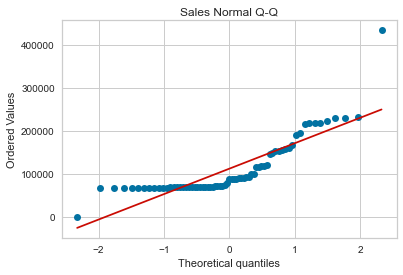

In [414]:
# The normal Q-Q plot 

stats.probplot(df_CB["Sales $"], dist="norm", plot=pylab, )
plt.title("Sales Normal Q-Q")
pylab.show()

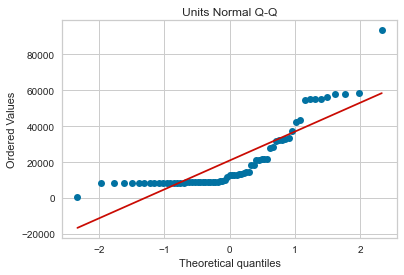

In [415]:
stats.probplot(df_CB["Units"], dist="norm", plot=pylab, )
plt.title("Units Normal Q-Q")
pylab.show()

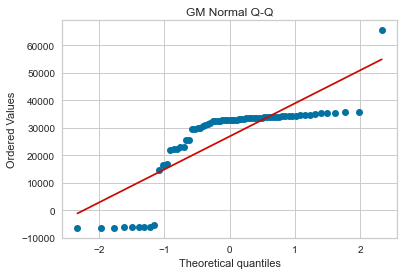

In [416]:
stats.probplot(df_CB["Gross Margin $"], dist="norm", plot=pylab, )
plt.title("GM Normal Q-Q")
pylab.show()

#### Baseline Linear Regression with Cross Validation
#### Single Feature: Discount

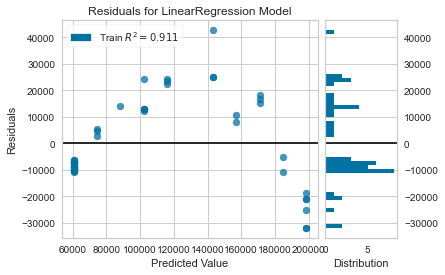

R^2 =0.9106 for target variable Sales $
Intercept =  60738.68
[0.90662814 0.83931164 0.92960575 0.88770809 0.29322833]
Discount at 0.25, the prediction will be 129621.46
Discount at 0.6, the prediction will be 226057.36




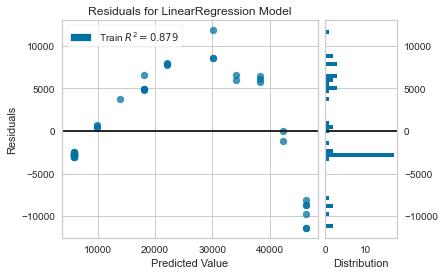

R^2 =0.8794 for target variable Units
Intercept =  5872.84
[ 0.85732204  0.82760542  0.91325286  0.8491609  -0.19131496]
Discount at 0.25, the prediction will be 26116.72
Discount at 0.6, the prediction will be 54458.14




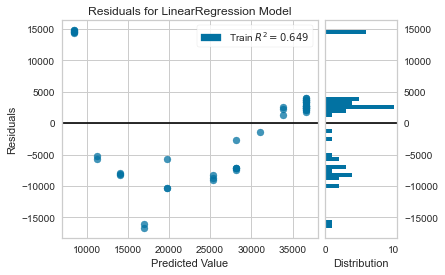

R^2 =0.6492 for target variable Gross Margin $
Intercept =  36660.03
[  0.54149456   0.71778717   0.75647755   0.64555171 -20.90891682]
Discount at 0.25, the prediction will be 22542.93
Discount at 0.6, the prediction will be 2778.99




In [563]:
target = ["Sales $","Units","Gross Margin $"]

for i in target:
    
    X = df_CB["Discount"].values
    y = df_CB[target][i]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    reg_1 = LinearRegression().fit(X_train.reshape((-1,1)), y_train)
    
    
    visualizer_1 = ResidualsPlot(reg_1)
    visualizer_1.fit(X_train.reshape((-1,1)), y_train)
    visualizer_1.show()
    print("R^2 ={} for target variable {}".format(round(reg_1.score(X_train.reshape((-1,1)), y_train),4),i))
    print("Intercept = ", round(reg_1.intercept_,2))
    scores = cross_val_score(reg_1, X_train.reshape((-1,1)), y_train, scoring='r2', cv=5)
    print(scores)
    predic = reg_1.predict(np.array([0.25]).reshape(-1,1))
    print("Discount at 0.25, the prediction will be {}".format(round(predic[0],2)))
    predic = reg_1.predict(np.array([0.6]).reshape(-1,1))
    print("Discount at 0.6, the prediction will be {}".format(round(predic[0],2)))
    print()
    print()


# Q5
What impact does being “On Flyer” have on performance?

In [480]:
x = df.groupby("On Flyer?").sum().index
y1 = df.groupby("On Flyer?").sum()["Sales $"]
y2 = df.groupby("On Flyer?").sum()["Units"]
y3 = df.groupby("On Flyer?").sum()["Transactions"]
y4 = df.groupby("On Flyer?").sum()["Gross Margin $"]

In [490]:
fig = make_subplots(rows=4, cols=1, shared_yaxes=True,
                   subplot_titles=("Sales if on Flyer", 
                                   "Units if on Flyer", 
                                   "Transactions if on Flyer",
                                   "Gross Margin if on Flyer"))

# df_1 = df[(df["Product"] == "Cracker Barrel")]

fig.add_trace(go.Bar(x=x, y=y1,text=y1,textposition="auto",texttemplate='%{text:.3s}'),
              1, 1)

fig.add_trace(go.Bar(x=x, y=y2,text=y2,textposition="auto",texttemplate='%{text:.3s}'),
              2, 1)

fig.add_trace(go.Bar(x=x, y=y3,text=y3,textposition="auto",texttemplate='%{text:.3s}'),
              3, 1)

fig.add_trace(go.Bar(x=x, y=y4,text=y4,textposition="auto",texttemplate='%{text:.3s}'),
              4, 1)

# Update xaxis properties
fig.update_xaxes(title_text="Sales", row=1, col=1)
fig.update_xaxes(title_text="Units", row=2, col=1)
fig.update_xaxes(title_text="Trasactions", row=3, col=1)
fig.update_xaxes(title_text="Gross Margin", row=4, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="On Flyer", row=1, col=1)
fig.update_yaxes(title_text="On Flyer", row=2, col=1)
fig.update_yaxes(title_text="On Flyer", row=3, col=1)
fig.update_yaxes(title_text="On Flyer", row=4, col=1)

fig.update_layout(height=1200, width=600, title_text="Cheese Performance If on Flyer")
fig.show()

Overall, we see Flyer has a **positive** impact on **Sales, Units, Transactions** but **negative** impact on **Gross Margin**

Overall cheeses that are on the flyer have **0.42M less GM** than those are not on the flyer

# Q6
Describe what might happen to sales of President’s Choice when Cracker Barrel is on promotion.  

In [491]:
df[df["Year"] == 2017]

,Year,PW,Product,Price,On Flyer?,Discount,Units,Sales $,Gross Margin $,Transactions
0,2017,1,Cracker Barrel,7.99,No,0.00,8630,68953.70,33570.70,8460
1,2017,2,Cracker Barrel,7.29,Yes,0.10,10183,74234.07,32483.77,9983
2,2017,3,Cracker Barrel,5.49,Yes,0.30,21568,118408.32,29979.52,17117
3,2017,4,Cracker Barrel,7.49,Yes,0.05,9309,69724.41,31557.51,9038
4,2017,5,Cracker Barrel,7.99,No,0.00,8462,67611.38,32917.18,8379
...,...,...,...,...,...,...,...,...,...,...
85,2017,40,President's Choice,4.99,No,0.00,11086,55319.14,24278.34,10660
86,2017,43,President's Choice,4.99,No,0.00,11412,56945.88,24992.28,10974
87,2017,46,President's Choice,4.99,No,0.00,11303,56401.97,24753.57,10974
88,2017,48,President's Choice,4.99,No,0.00,10873,54256.27,23811.87,10556


In [496]:
df[df["Year"] == 2017]["Product"].value_counts()

Cracker Barrel         53
President's Choice     21
Name: Product, dtype: int64

In [517]:
# PC vs Cracker Barrel in Year 2017

x1 = df[(df["Year"] == 2017) & (df["Product"] == "Cracker Barrel")]["PW"]
x2 = df[(df["Year"] == 2017) & (df["Product"] != "Cracker Barrel")]["PW"]
y1 = df[(df["Year"] == 2017) & (df["Product"] == "Cracker Barrel")]["Sales $"]
y2 = df[(df["Year"] == 2017) & (df["Product"] != "Cracker Barrel")]["Sales $"]
y3 = df[(df["Year"] == 2017) & (df["Product"] == "Cracker Barrel")]["Discount"]


# Create traces
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=x1, y=y1,
                    mode='lines',
                    name='Cracker Barrel Sales $'),
             secondary_y=False)

fig.add_trace(go.Scatter(x=x2, y=y2,
                    mode='lines',
                    name="President Choice's Sales $"),
             secondary_y=False)

fig.add_trace(go.Scatter(x=x1, y=y3,
                    mode='lines',
                    name='Cracker Barrel Discount Rate'),
             secondary_y=True)


fig.update_layout(title="Sales of PC vs Cracker Barrel in Year 2017 Varying by Cracker Barrel's Discount",
                   xaxis_title='PW',
                   yaxis_title='$ Value')

# Set y-axes titles
fig.update_yaxes(title_text="Sales $ Value", secondary_y=False)
fig.update_yaxes(title_text="Discount Rate", secondary_y=True)

fig.show()

In [521]:
# PC vs Cracker Barrel in Year 2018

x1 = df[(df["Year"] == 2018) & (df["Product"] == "Cracker Barrel")]["PW"]
x2 = df[(df["Year"] == 2018) & (df["Product"] != "Cracker Barrel")].sort_values("PW",ascending = False)["PW"]
y1 = df[(df["Year"] == 2018) & (df["Product"] == "Cracker Barrel")]["Sales $"]
y2 = df[(df["Year"] == 2018) & (df["Product"] != "Cracker Barrel")].sort_values("PW",ascending = False)["Sales $"]
y3 = df[(df["Year"] == 2018) & (df["Product"] == "Cracker Barrel")]["Discount"]


# Create traces
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=x1, y=y1,
                    mode='lines',
                    name='Cracker Barrel Sales $'),
             secondary_y=False)

fig.add_trace(go.Scatter(x=x2, y=y2,
                    mode='lines',
                    name="President Choice's Sales $"),
             secondary_y=False)

fig.add_trace(go.Scatter(x=x1, y=y3,
                    mode='lines',
                    name='Cracker Barrel Discount Rate'),
             secondary_y=True)


fig.update_layout(title="Sales of PC vs Cracker Barrel in Year 2018 Varying by Cracker Barrel's Discount",
                   xaxis_title='PW',
                   yaxis_title='$ Value')

# Set y-axes titles
fig.update_yaxes(title_text="Sales $ Value", secondary_y=False)
fig.update_yaxes(title_text="Discount Rate", secondary_y=True)

fig.show()

In year **2017**,

Overall PC cheese sales was **flat** whenever Cracker Barrel promoted its products discount

In Year **2018**,

Cracker Barrel's promotion returns a **negative impact(decrease)** PC's cheese sales, during the first 16 PW when Cracker Barrel promoted its products discount

# Q7
Your director wants to change the price on an upcoming President’s Choice flyer promotion. Her goal is to maximize sales, but she does not want to sacrifice too much margin. 

a.	How would you present the data to help her make the decision?

b.	What price would you recommend?


In [442]:
# from the filtered dataset we see that PC on Flyer products are all from Year 2018

df_PC[df_PC["On Flyer?"] == "Yes"].sort_values("Price").groupby("Price").sum()

,Year,PW,Discount,Units,Sales $,Gross Margin $,Transactions
Price,,,,,,,
2.49,2018,39,0.50,77200,192228.00,-23932.000000,22396
2.99,12108,155,2.40,342560,1024254.40,65086.400000,133689
3.29,10090,181,1.75,242499,797821.71,118824.510000,107227
3.49,12108,112,1.80,224721,784276.29,155057.490000,128756
3.99,12108,138,1.20,140366,560060.34,167035.540000,104672
4.29,10090,73,0.75,77185,331123.65,116320.697513,63159
4.49,2018,13,0.10,12630,56708.70,21339.947228,11254
4.79,2018,15,0.05,11529,55223.91,22942.710000,11303


In [471]:
# we can either choose the 
# 1. max sales point 
# 2. break-even point where sales = gross margin

x = df_PC[df_PC["On Flyer?"] == "Yes"].sort_values("Price").groupby("Price").sum().index
y1 = df_PC[df_PC["On Flyer?"] == "Yes"].sort_values("Price").groupby("Price").sum()["Sales $"]
y2 = df_PC[df_PC["On Flyer?"] == "Yes"].sort_values("Price").groupby("Price").sum()["Gross Margin $"]


fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=y1, name='Sales $',))

fig.add_trace(go.Scatter(x=x, y=y2, name='Gross Margin $',))

fig.add_annotation(x=2.99,y=1024254,xref="x",yref="y",text="P=2.99 Sales=1024254 GM=65086.4",font=dict(
            family="Courier New, monospace",
            size=11,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1.5,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8,
        showarrow=True)
                         
                         
# Edit the layout
fig.update_layout(title='PC on Flyer Products Sales vs GM Varying by Price',
                   xaxis_title='Price',
                   yaxis_title='$ Value',)


fig.show()

a. dataset will be presented as above. we choose the PC products that are on the Flyer, sorted and grouped by "Price"

b. As the scatter chart shown above, at **Price 2.99** will return the **max Sales** without sacrificing too much margin

# Q8

President’s Choice sold at $2.49 is a “loss leader” promotion. We lose money selling it at this price, but hope that people who came to buy it will purchase other items.

i.	Is President’s Choice @ $2.49 an effective loss leader? Explain why or why not.

ii.	Your director proposes to change the promotion to 2/5 or pay  2.99 each, hoping that this will improve margin. Will this work? Explain why or why not.


In [561]:
x = df.sort_values("Price").groupby("Price").sum().index

# Cracker Barrel GM by Price
y1 = df.sort_values("Price")[df["Product"] == "Cracker Barrel"].groupby("Price").sum()["Gross Margin $"]

# PC GM by Price
y2 = df.sort_values("Price")[df["Product"] != "Cracker Barrel"].groupby("Price").sum()["Gross Margin $"]


fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=y1, name='Cracker Barrel Gross Margin',mode = "lines",
                        text=y1.values,textposition="top right",
                        texttemplate='%{text:.3s}'))

fig.add_trace(go.Scatter(x=x, y=y2, name='PC Gross Margin',mode = "lines",
                        text=y2.values,textposition="bottom left",
                        texttemplate='%{text:.3s}'))

fig.add_annotation(x=2.99,y=65086.4,xref="x",yref="y",text="P=2.99 GM=65086.4",font=dict(
            family="Courier New, monospace",
            size=11,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1.5,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8,
        showarrow=True)

fig.add_annotation(x=2.49,y=-23932,xref="x",yref="y",text="P=2.49 GM=-23932",font=dict(
            family="Courier New, monospace",
            size=11,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1.5,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8,
        showarrow=True)

# Edit the layout
fig.update_layout(title='PC Gross Margin Varying by Price',
                   xaxis_title='Price',
                   yaxis_title='$ Value',)


fig.show()

In [548]:
df.sort_values("Discount")[df["Product"] != "Cracker Barrel"].groupby("Discount").sum()

,Year,PW,Price,Units,Sales $,Gross Margin $,Transactions
Discount,,,,,,,
0.00,58501,619,144.71,316371,1578691.29,692852.490000,306389
0.05,2018,15,4.79,11529,55223.91,22942.710000,11303
0.10,2018,13,4.49,12630,56708.70,21339.947228,11254
0.15,10090,73,21.45,77185,331123.65,116320.697513,63159
0.20,16144,173,31.92,179182,714936.18,213226.580000,132541
0.30,18162,179,31.41,320846,1119752.54,221383.740000,181374
0.35,14126,232,23.03,325414,1070612.06,159452.860000,143049
0.40,12108,155,17.94,342560,1024254.40,65086.400000,133689
0.50,2018,39,2.49,77200,192228.00,-23932.000000,22396


In [557]:
x = df.sort_values("Discount")[df["Product"] != "Cracker Barrel"].groupby("Discount").sum().index


y1 = df.sort_values("Discount")[df["Product"] == "Cracker Barrel"].groupby("Discount").sum()["Gross Margin $"]
y2 = df.sort_values("Discount")[df["Product"] != "Cracker Barrel"].groupby("Discount").sum()["Gross Margin $"]

fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=x, y=y1, name='Craker Barrel Gross Margin',mode = "lines",))

fig.add_trace(go.Scatter(x=x, y=y2, name='PC Gross Margin',mode = "lines",))

fig.add_annotation(x=0.4,y=65086.4,xref="x",yref="y",text="Dis=0.4 GM=65086.4",font=dict(
            family="Courier New, monospace",
            size=11,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1.5,
        arrowwidth=1,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="#ff7f0e",
        opacity=0.8,
        showarrow=True)


# Edit the layout
fig.update_layout(title='PC Gross Margin Varying by Promotion Discount',
                   xaxis_title='Discount',
                   yaxis_title='$ Value',)


fig.show()

PC selling price at 2.49 indeed is a “loss leader” promotion.

i. At this price point PC shows a Gross Margin of -23,932 and Cracker Barrel shows a Gross Margin of -49,430.3

ii. Change the promotion to **2/5** or pay **2.99** each end up with the same result, lifting **PC's Gross Margin to 65,086.4**,
    which is around **370%** increase